In [3]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
import numpy as np
import pandas as pd


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [30]:
df = pd.read_csv(r'C:\Users\think\Desktop\AA\evidence.csv',delimiter=',',encoding='utf-8')
df.head()

,topic,the concept of the topic,candidate,candidate masked,label,wikipedia article name,wikipedia url
0,We should limit executive compensation,executive compensation,A say on pay - a non-binding vote of the gener...,A say on pay - a non-binding vote of the gener...,0,Executive pay,https://en.wikipedia.org/wiki/Executive_pay
1,We should limit executive compensation,executive compensation,"A February 2009 report, published by the Insti...","A February 2009 report, published by the Insti...",1,Executive pay,https://en.wikipedia.org/wiki/Executive_pay
2,We should limit executive compensation,executive compensation,The Financial Crisis has had a relatively smal...,The Financial Crisis has had a relatively smal...,0,Executive pay,https://en.wikipedia.org/wiki/Executive_pay
3,We should limit executive compensation,executive compensation,"1990-1992 Lineberger Cancer Center, SPA person...","1990-1992 Lineberger Cancer Center, SPA person...",0,Edison Liu,https://en.wikipedia.org/wiki/Edison_Liu
4,We should limit executive compensation,executive compensation,Countering the public uproar over excessive ex...,Countering the public uproar over excessive TO...,0,Jack Welch,https://en.wikipedia.org/wiki/Jack_Welch


In [24]:
df.drop(['id','mc','suffix','prefix','url'],axis=1,inplace=True)

In [25]:
df.head()

,topic,sentence
0,We should abandon Youtube,"On 21 May 2017, the second annual Sidemen char..."
1,We should abandon Youtube,These videos are posted to sites such as YouTu...
2,We should abandon Youtube,"On 11 December 2013, Albarn released a 21-seco..."
3,We should abandon Youtube,All videos were later freely offered on Tankia...
4,We should abandon Youtube,"November 14, 2007-A Vidster user on YouTube cr..."


Text(0.5,1,'topic numbers')

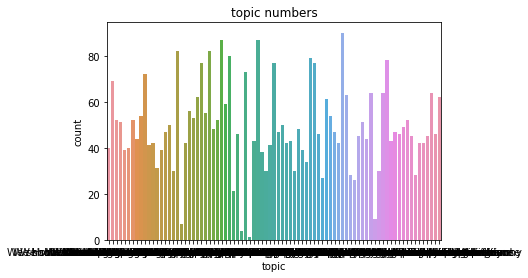

In [32]:
sns.countplot(df.topic)
plt.xlabel('topic')
plt.title('topic numbers')

In [34]:
X = df.candidate
Y = df.topic
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [36]:
max_words = 10000
max_len = 1500
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [37]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [38]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 1500)              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 1500, 50)          500000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [39]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 2764 samples, validate on 691 samples
Epoch 1/10
2176/2764 [======================>.......] - ETA: 8s - loss: -373.1850 - acc: 0.0133 

KeyboardInterrupt: 

In [16]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [17]:
accr = model.evaluate(test_sequences_matrix,Y_test)

610/610 [==============================] - 3s 5ms/step


In [18]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.572
  Accuracy: 0.731
